In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras import backend
#from keras.utils.vis_utils import plot_model
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.initializers import RandomUniform
from keras.layers import LeakyReLU
from keras.layers import PReLU

np.set_printoptions(suppress=True)

backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
d = np.loadtxt("/content/drive/MyDrive/Semillero/pima-indians-diabetes.csv", delimiter=",") #se guarda en un array
print("Original: ",d.shape)
print(d[:3])

Original:  (768, 9)
[[  6.    148.     72.     35.      0.     33.6     0.627  50.      1.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.      0.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.      1.   ]]


In [ ]:
min_max = []
for i in range(8):
  min_max.append((min(d[:,i]), max(d[:,i]))) #(x-x_min)/(x_max-x_min)
min_max

[(0.0, 17.0),
 (0.0, 199.0),
 (0.0, 122.0),
 (0.0, 99.0),
 (0.0, 846.0),
 (0.0, 67.1),
 (0.078, 2.42),
 (21.0, 81.0)]

In [ ]:
dataset = d.copy()

In [ ]:
for mm in range(len(min_max)):
  for i in range(len(d)):
    dataset[i][mm] = (d[i][mm]-min_max[mm][0])/(min_max[mm][1]-min_max[mm][0])

### Variables predictorias y variable objetivo

In [ ]:
#X = dataset[:, 0:8]
#print("Entrenamento: ",X.shape)
#print(X[:3])

#Y = dataset[:,8]
#print("Prueba: ",Y.shape)
#print(Y[:3])

Conjuntos de entrenamiento, validación y prueba ->muestra representativa

In [ ]:
diab = np.array([])
nodiab = np.array([])
for i in dataset:
  if i[8] == 1:
    diab = np.append(diab, i)
  else:
    nodiab = np.append(nodiab, i)

diab = diab.reshape(-1, len(dataset[0]))
nodiab = nodiab.reshape(-1, len(dataset[0]))

In [ ]:
porcentajes = (len(diab)*100/len(dataset), len(nodiab)*100/len(dataset))
porcentajes

(34.895833333333336, 65.10416666666667)

entrenamiento (diab= 160, nodiab = 300)

validacion y test (diab= 54, nodiab = 100) c/u

In [ ]:
import random

In [ ]:
random.shuffle(list(diab))
random.shuffle(list(nodiab))

In [ ]:
entrenamiento = np.vstack((diab[:160], nodiab[:300]))
random.shuffle(list(entrenamiento))
ent_VarObjetivo= entrenamiento[:,8]
entrenamiento = entrenamiento[:, 0:8]

In [ ]:
validacion = np.vstack((diab[160:214], nodiab[300:400]))
random.shuffle(list(validacion))
val_VarObjetivo= validacion[:,8]
validacion = validacion[:, 0:8]

In [ ]:
prueba = np.vstack((diab[214:], nodiab[400:]))
random.shuffle(list(prueba))
pru_VarObjetivo= prueba[:,8]
prueba = prueba[:, 0:8]

Verificación de porcentajes

In [ ]:
(sum(ent_VarObjetivo == 1)*100/len(list(entrenamiento)), sum(ent_VarObjetivo == 0)*100/len(list(entrenamiento)))

(34.78260869565217, 65.21739130434783)

In [ ]:
(sum(val_VarObjetivo == 1)*100/len(list(validacion)), sum(val_VarObjetivo == 0)*100/len(list(validacion)))

(35.064935064935064, 64.93506493506493)

In [ ]:
(sum(pru_VarObjetivo == 1)*100/len(list(prueba)), sum(pru_VarObjetivo == 0)*100/len(list(prueba)))

(35.064935064935064, 64.93506493506493)

## Modelo 1

In [ ]:
model1 = Sequential()
model1.add(Dense(16,
                kernel_initializer=RandomUniform(seed = 42),
                bias_initializer=RandomUniform(seed = 42),
                activation='relu',
                name="Oculta_1",
                input_dim=8
                ))
model1.add(Dense(8,
                kernel_initializer=RandomUniform(seed = 42),
                bias_initializer=RandomUniform(seed = 42),
                activation='relu',
                name="Oculta_2"))
model1.add(Dense(4,
                kernel_initializer=RandomUniform(seed = 42),
                bias_initializer=RandomUniform(seed = 42),
                activation='relu',
                name="Oculta_3"))
model1.add(Dense(2,
                kernel_initializer=RandomUniform(seed = 42),
                bias_initializer=RandomUniform(seed = 42),
                activation='relu',
                name="Oculta_4"))
model1.add(Dense(1,
                kernel_initializer=RandomUniform(seed = 42),
                bias_initializer=RandomUniform(seed = 42),
                activation='sigmoid',
                name="Salida"))
model1._name="Redcita"

op = tf.keras.optimizers.Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',
              optimizer=op,
              metrics=['accuracy'])

In [ ]:
fitting1 = model1.fit(entrenamiento, ent_VarObjetivo, epochs=50, batch_size=5)

Epoch 1/50
92/92 [==============================] - 1s 2ms/step - loss: 0.6675 - accuracy: 0.6522
Epoch 2/50
92/92 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.6522
Epoch 3/50
92/92 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.6522
Epoch 4/50
92/92 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.6522
Epoch 5/50
92/92 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.6522
Epoch 6/50
92/92 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.6522
Epoch 7/50
92/92 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6522
Epoch 8/50
92/92 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.6522
Epoch 9/50
92/92 [==============================] - 0s 2ms/step - loss: 0.6466 - accuracy: 0.6522
Epoch 10/50
92/92 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.6522
Epoch 11/50
92/92 [

##Modelo 2

In [ ]:
model2 = Sequential()
model2.add(Dense(90,
                kernel_initializer=RandomUniform(seed = 42),
                bias_initializer=RandomUniform(seed = 42),
                activation='selu',
                name="Oculta_1",
                input_dim=8
                ))
model2.add(Dense(75,
                kernel_initializer=RandomUniform(seed = 42),
                bias_initializer=RandomUniform(seed = 42),
                activation='selu',
                name="Oculta_2"))
model2.add(Dense(60,
                kernel_initializer=RandomUniform(seed = 42),
                bias_initializer=RandomUniform(seed = 42),
                activation='selu',
                name="Oculta_3"))
model2.add(Dense(45,
                kernel_initializer=RandomUniform(seed = 42),
                bias_initializer=RandomUniform(seed = 42),
                activation='selu',
                name="Oculta_4"))
model2.add(Dense(30,
                kernel_initializer=RandomUniform(seed = 42),
                bias_initializer=RandomUniform(seed = 42),
                activation='selu',
                name="Oculta_5"))
model2.add(Dense(15,
                kernel_initializer=RandomUniform(seed = 42),
                bias_initializer=RandomUniform(seed = 42),
                activation='selu',
                name="Oculta_6"))
model2.add(Dense(1,
                kernel_initializer=RandomUniform(seed = 42),
                bias_initializer=RandomUniform(seed = 42),
                activation='sigmoid',
                name="Salida"))
model2._name="Redcita"

op = tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(loss='binary_crossentropy',
              optimizer=op,
              metrics=['accuracy'])

In [ ]:
fitting2 = model2.fit(entrenamiento, ent_VarObjetivo, epochs=300, batch_size=15)

Epoch 1/300
31/31 [==============================] - 2s 4ms/step - loss: 0.6795 - accuracy: 0.6522
Epoch 2/300
31/31 [==============================] - 0s 5ms/step - loss: 0.6500 - accuracy: 0.6522
Epoch 3/300
31/31 [==============================] - 0s 5ms/step - loss: 0.6485 - accuracy: 0.6522
Epoch 4/300
31/31 [==============================] - 0s 4ms/step - loss: 0.6278 - accuracy: 0.6717
Epoch 5/300
31/31 [==============================] - 0s 4ms/step - loss: 0.5778 - accuracy: 0.7065
Epoch 6/300
31/31 [==============================] - 0s 4ms/step - loss: 0.5496 - accuracy: 0.7261
Epoch 7/300
31/31 [==============================] - 0s 4ms/step - loss: 0.5196 - accuracy: 0.7478
Epoch 8/300
31/31 [==============================] - 0s 4ms/step - loss: 0.5156 - accuracy: 0.7543
Epoch 9/300
31/31 [==============================] - 0s 4ms/step - loss: 0.5067 - accuracy: 0.7609
Epoch 10/300
31/31 [==============================] - 0s 4ms/step - loss: 0.5122 - accuracy: 0.7565
Epoch 11/

## Modelo 3

In [ ]:
model3 = Sequential()
model3.add(Dense(32,
                kernel_initializer=RandomUniform(seed = 42),
                bias_initializer=RandomUniform(seed = 42),
                name="Oculta_1",
                input_dim=8
                ))
model3.add(PReLU())
model3.add(Dense(16,
                kernel_initializer=RandomUniform(seed = 42),
                bias_initializer=RandomUniform(seed = 42),
                name="Oculta_2"))
model3.add(PReLU())
model3.add(Dense(8,
                kernel_initializer=RandomUniform(seed = 42),
                bias_initializer=RandomUniform(seed = 42),
                name="Oculta_3"))
model3.add(PReLU())
model3.add(Dense(4,
                kernel_initializer=RandomUniform(seed = 42),
                bias_initializer=RandomUniform(seed = 42),
                name="Oculta_4"))
model3.add(PReLU())
model3.add(Dense(2,
                kernel_initializer=RandomUniform(seed = 42),
                bias_initializer=RandomUniform(seed = 42),
                name="Oculta_5"))
model3.add(PReLU())
model3.add(Dense(1,
                kernel_initializer=RandomUniform(seed = 42),
                bias_initializer=RandomUniform(seed = 42),
                activation='sigmoid',
                name="Salida"))
model3._name="Redcita"

op = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model3.compile(loss='binary_crossentropy',
              optimizer=op,
              metrics=['accuracy'])

In [ ]:
fitting3 = model3.fit(entrenamiento, ent_VarObjetivo, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 1s 2ms/step - loss: 0.6879 - accuracy: 0.6522
Epoch 2/500
46/46 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.6522
Epoch 3/500
46/46 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.6522
Epoch 4/500
46/46 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.6522
Epoch 5/500
46/46 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6522
Epoch 6/500
46/46 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.6522
Epoch 7/500
46/46 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.6522
Epoch 8/500
46/46 [==============================] - 0s 3ms/step - loss: 0.6593 - accuracy: 0.6522
Epoch 9/500
46/46 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.6522
Epoch 10/500
46/46 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.6522
Epoch 11/

## Matriz de confusión

Cuantificar qué tan bien funciona un modelo de clasificación (desempeño)

In [ ]:
from sklearn.metrics import confusion_matrix #librería

In [ ]:
#Modelo 1
prediction1_val = model1.predict(validacion)
prediction1_val = np.round(prediction1_val)

result1_val = confusion_matrix(val_VarObjetivo, prediction1_val)
print(result1_val)

5/5 [==============================] - 0s 3ms/step
[[100   0]
 [ 54   0]]


In [ ]:
prediction1_ent = model1.predict(entrenamiento)
prediction1_ent = np.round(prediction1_ent)

result1_ent = confusion_matrix(ent_VarObjetivo, prediction1_ent)
print(result1_ent)

15/15 [==============================] - 0s 2ms/step
[[300   0]
 [160   0]]


In [ ]:
#Modelo 2
prediction2_val = model2.predict(validacion)
prediction2_val = np.round(prediction2_val)

result2_val = confusion_matrix(val_VarObjetivo, prediction2_val)
print(result2_val)

5/5 [==============================] - 0s 3ms/step
[[88 12]
 [14 40]]


In [ ]:
prediction2_ent = model2.predict(entrenamiento)
prediction2_ent = np.round(prediction2_ent)

result2_ent = confusion_matrix(ent_VarObjetivo, prediction2_ent)
print(result2_ent)

15/15 [==============================] - 0s 4ms/step
[[249  51]
 [ 41 119]]


In [ ]:
#Modelo 3
prediction3_val = model3.predict(validacion)
prediction3_val = np.round(prediction3_val)

result3_val = confusion_matrix(val_VarObjetivo, prediction3_val)
print(result3_val)

5/5 [==============================] - 0s 4ms/step
[[86 14]
 [25 29]]


In [ ]:
prediction3_ent = model3.predict(entrenamiento)
prediction3_ent = np.round(prediction3_ent)

result3_ent = confusion_matrix(ent_VarObjetivo, prediction3_ent)
print(result3_ent)

15/15 [==============================] - 0s 3ms/step
[[262  38]
 [ 33 127]]


## Métricas

In [ ]:
def accuracy(matriz):
  num = matriz[0][0] + matriz[1][1]
  den = matriz[0][0] + matriz[0][1] + matriz[1][0] + matriz[1][1]
  return num / den

In [ ]:
def precision(matriz):
  num = matriz[1][1]
  den = matriz[0][1] + matriz[1][1]
  return num / den

In [ ]:
def sensibilidad(matriz):
  num = matriz[1][1]
  den = matriz[1][0] + matriz[1][1]
  return num / den

In [ ]:
def especificidad(matriz):
  num = matriz[0][0]
  den = matriz[0][0] + matriz[0][1]
  return num / den

In [ ]:
def npv(matriz):
  num = matriz[0][0]
  den = matriz[0][0] + matriz[1][0]
  return num / den

In [ ]:
def f1_score(matriz):
  pr = precision(matriz)
  sens = sensibilidad(matriz)
  return 2  * ((pr*sens)/(pr+sens))

In [ ]:
metricas = [accuracy, precision, sensibilidad, especificidad, npv, f1_score]
matrices = [[result1_ent, result1_val], [result2_ent, result2_val], [result3_ent, result3_val]]

In [ ]:
for modelo in range(3):
  print('-'*50)
  print(f'Modelo {modelo + 1}')
  for metrica in metricas:
    ent = metrica(matrices[modelo][0])
    val = metrica(matrices[modelo][1])
    print(f'\t{metrica.__name__}: {ent}, {val}')

--------------------------------------------------
Modelo 1
	accuracy: 0.6521739130434783, 0.6493506493506493
	precision: nan, nan
	sensibilidad: 0.0, 0.0
	especificidad: 1.0, 1.0
	npv: 0.6521739130434783, 0.6493506493506493
	f1_score: nan, nan
--------------------------------------------------
Modelo 2
	accuracy: 0.8, 0.8311688311688312
	precision: 0.7, 0.7692307692307693
	sensibilidad: 0.74375, 0.7407407407407407
	especificidad: 0.83, 0.88
	npv: 0.8586206896551725, 0.8627450980392157
	f1_score: 0.7212121212121212, 0.7547169811320754
--------------------------------------------------
Modelo 3
	accuracy: 0.8456521739130435, 0.7467532467532467
	precision: 0.7696969696969697, 0.6744186046511628
	sensibilidad: 0.79375, 0.5370370370370371
	especificidad: 0.8733333333333333, 0.86
	npv: 0.888135593220339, 0.7747747747747747
	f1_score: 0.7815384615384614, 0.597938144329897


<ipython-input-34-5e619b3c1ce5>:4: RuntimeWarning: invalid value encountered in long_scalars
  return num / den


- **Modelo 1**: subajustado - mal desempeño en entrenamiento y validación - todo lo predice como la clase negativa
- **Modelo 2**: bien ajustado - buen desempeño en entrenamiento y validación
- **Modelo 3**: sobre ajustado - buen desempeño en entrenamiento y malo en validación

El modelo 2 gana al tener la mejor sensibilidad y tener un buen ajuste

## Visualizar desempeños de entrenamiento

In [ ]:
# Para graficas re lindas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=9)
mpl.rc('xtick', labelsize=9)
mpl.rc('ytick', labelsize=9)

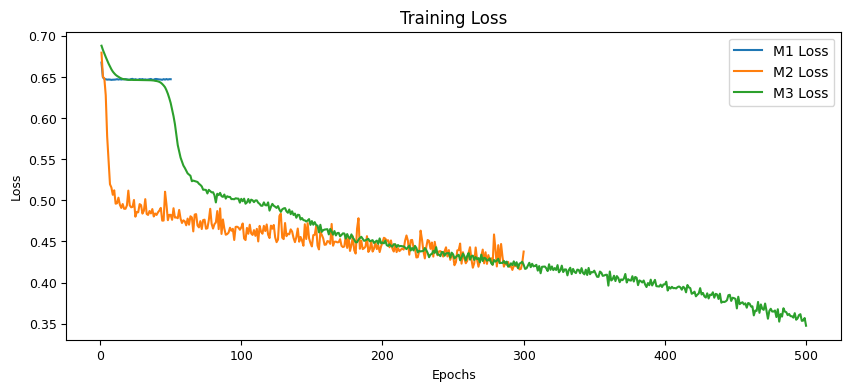

In [ ]:
M1_train_values = fitting1.history["loss"]
M2_train_values = fitting2.history["loss"]
M3_train_values = fitting3.history["loss"]

#epochs = range(1, 400)

plt.figure(figsize=(10,4))

plt.plot(range(1, 51), M1_train_values, label='M1 Loss')
plt.plot(range(1, 301), M2_train_values,label='M2 Loss')
plt.plot(range(1, 501), M3_train_values, label='M3 Loss')


plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(loc='best')
plt.show()

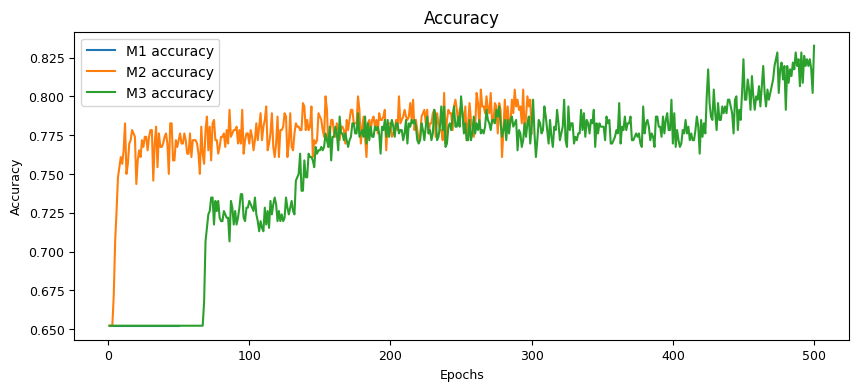

In [ ]:
M1_train_values = fitting1.history["accuracy"]
M2_train_values = fitting2.history["accuracy"]
M3_train_values = fitting3.history["accuracy"]

#epochs = range(1, 400)

plt.figure(figsize=(10,4))

plt.plot(range(1, 51), M1_train_values, label='M1 accuracy')
plt.plot(range(1, 301), M2_train_values,label='M2 accuracy')
plt.plot(range(1, 501), M3_train_values, label='M3 accuracy')


plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(loc='best')
plt.show()

## Validación

Accuracy: No es buena si las clases están desbalanceadas. Da 65% de accuracy porque a todos los datos les dice que no tiene diabetes - como es la mayoría, se inclina a que todo el mundo no tiene diabetes

In [ ]:
scores1 = model1.evaluate(validacion, val_VarObjetivo)
print("%s: %.2f%%" % (model1.metrics_names[1], scores1[1]*100))

5/5 [==============================] - 0s 4ms/step - loss: 0.6478 - accuracy: 0.6494
accuracy: 64.94%


In [ ]:
scores2 = model2.evaluate(validacion, val_VarObjetivo)
print("%s: %.2f%%" % (model2.metrics_names[1], scores2[1]*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.4280 - accuracy: 0.8312
accuracy: 83.12%


In [ ]:
scores3 = model3.evaluate(validacion, val_VarObjetivo)
print("%s: %.2f%%" % (model3.metrics_names[1], scores3[1]*100))

5/5 [==============================] - 0s 5ms/step - loss: 0.7716 - accuracy: 0.7468
accuracy: 74.68%


## Prueba

In [ ]:
scores_final = model2.evaluate(prueba, pru_VarObjetivo)
print("%s: %.2f%%" % (model2.metrics_names[1], scores_final[1]*100))

5/5 [==============================] - 0s 5ms/step - loss: 0.5127 - accuracy: 0.7987
accuracy: 79.87%


In [ ]:
prediction_pru = model2.predict(prueba)
prediction_pru = np.round(prediction_pru)

result_pru = confusion_matrix(pru_VarObjetivo, prediction_pru)
print(result_pru)

5/5 [==============================] - 0s 5ms/step
[[85 15]
 [16 38]]


In [ ]:
for metrica in metricas:
  print(f'{metrica.__name__}: {metrica(result_pru)}')

accuracy: 0.7987012987012987
precision: 0.7169811320754716
sensibilidad: 0.7037037037037037
especificidad: 0.85
npv: 0.8415841584158416
f1_score: 0.7102803738317758


## Probabilidades del modelo

In [ ]:
probs = model2.predict(prueba)

5/5 [==============================] - 0s 5ms/step


### General

Certeza (promedio): 0.38274562
Mediana: 0.33448976
Cuartiles: 0.1423976868391037, 0.33448977768421173, 0.5860499739646912
Probabilidad mínima: 0.017377911
Probabilidad máxima: 0.94617546


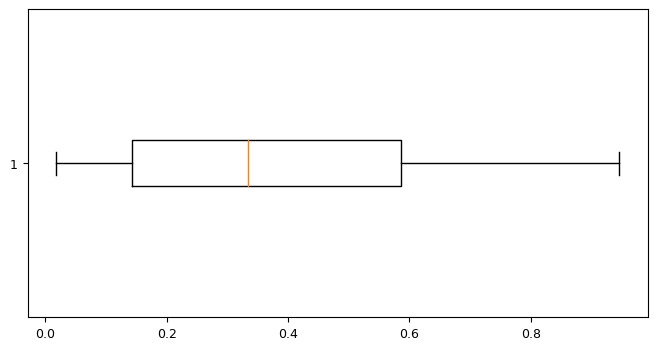

In [ ]:
print('Certeza (promedio):', np.average(probs))
print('Mediana:', np.median(probs))
print(f'Cuartiles: {np.percentile(probs, 25)}, {np.percentile(probs, 50)}, {np.percentile(probs, 75)}')
print('Probabilidad mínima:', min(probs)[0])
print('Probabilidad máxima:', max(probs)[0])
fig = plt.figure(figsize =(8, 4))
plt.boxplot(probs, vert = False)
plt.show()

### Clase positiva

Certeza (promedio): 0.69336706
Mediana: 0.6649718
Cuartiles: 0.584929883480072, 0.6649718284606934, 0.8203628659248352
Probabilidad mínima: 0.5168587
Probabilidad máxima: 0.94617546


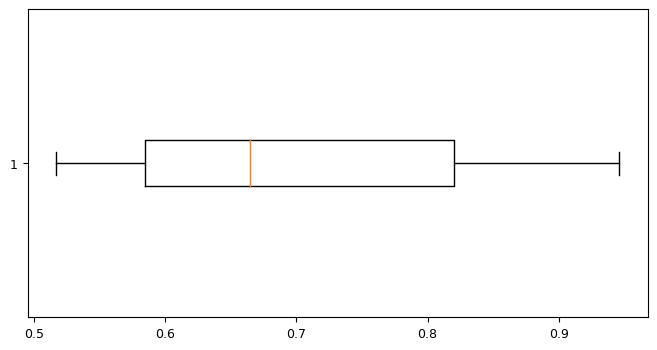

In [ ]:
probs_positivas = probs[probs >= 0.5]
print('Certeza (promedio):', np.average(probs_positivas))
print('Mediana:', np.median(probs_positivas))
print(f'Cuartiles: {np.percentile(probs_positivas, 25)}, {np.percentile(probs_positivas, 50)}, {np.percentile(probs_positivas, 75)}')
print('Probabilidad mínima:', min(probs_positivas))
print('Probabilidad máxima:', max(probs_positivas))
fig = plt.figure(figsize =(8, 4))
plt.boxplot(probs_positivas, vert = False)
plt.show()

### Clase negativa

Certeza (promedio): 0.21974619
Mediana: 0.19841127
Cuartiles: 0.10021845996379852, 0.1984112709760666, 0.3261233866214752
Probabilidad mínima: 0.017377911
Probabilidad máxima: 0.4976451


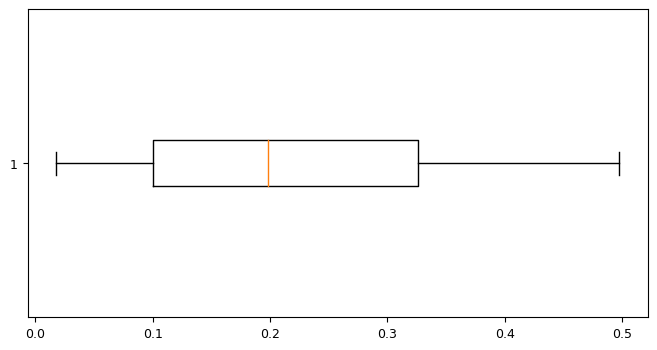

In [ ]:
probs_negativas = probs[probs < 0.5]
print('Certeza (promedio):', np.average(probs_negativas))
print('Mediana:', np.median(probs_negativas))
print(f'Cuartiles: {np.percentile(probs_negativas, 25)}, {np.percentile(probs_negativas, 50)}, {np.percentile(probs_negativas, 75)}')
print('Probabilidad mínima:', min(probs_negativas))
print('Probabilidad máxima:', max(probs_negativas))
fig = plt.figure(figsize =(8, 4))
plt.boxplot(probs_negativas, vert = False)
plt.show()

In [ ]:
N=3
print("Datos a predecir")
X_new = prueba[:N]
Y_deverdadcita = pru_VarObjetivo[:N]
print(X_new)

print("\Chsiomosean las prediciones")
y_proba = model2.predict(X_new)
print("Valores reales:",Y_deverdadcita)
print("Probabilidades:",y_proba.reshape(N).round(2))
print("Valores predichos:",np.round(y_proba).reshape(N))

Datos a predecir
[[0.52941176 0.56281407 0.67213115 0.24242424 0.         0.42026826
  0.51409052 0.48333333]
 [0.         0.59798995 0.         0.         0.         0.4828614
  0.02690009 0.05      ]
 [0.41176471 0.57286432 0.52459016 0.         0.         0.40834575
  0.27924851 0.21666667]]
\Chsiomosean las prediciones
1/1 [==============================] - 0s 33ms/step
Valores reales: [1. 1. 1.]
Probabilidades: [0.27 0.46 0.56]
Valores predichos: [0. 0. 1.]


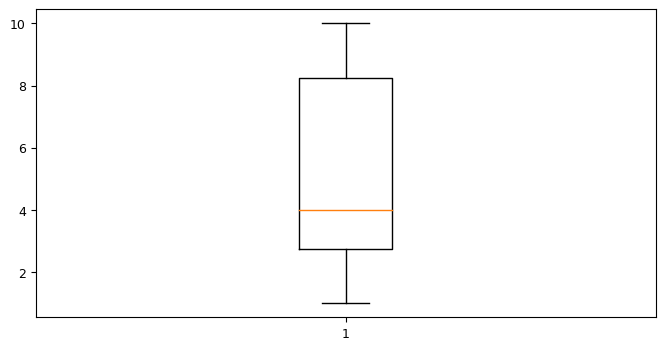

In [ ]:
x = np.array([1,2,3,4,4,8,9,10])
fig = plt.figure(figsize =(8, 4))
plt.boxplot(x)
plt.show()

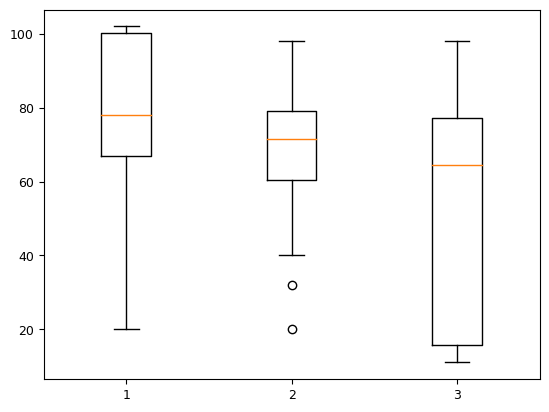

In [ ]:
value1 = [84,77,20,40,67,62,75,78,71,32,98,89,78,67,100,101,102,102,102,102]
value2= [84,77,20,40,67,62,75,78,71,32,98,89,78,67,72,82,87,66,56,52]
value3= [84,77,20,40,67,62,75,78,71,32,98,89,78,67,15,16,14,13,12,11]

box_plot_data=[value1,value2, value3]
plt.boxplot(box_plot_data)
plt.show()

In [ ]:
print('Mediana:', np.median(value1))
print('Cuartil 1:', np.percentile(value1, 25))

Mediana: 78.0
Cuartil 1: 67.0


In [ ]:
value2.sort()
value2

[20,
 32,
 40,
 52,
 56,
 62,
 66,
 67,
 67,
 71,
 72,
 75,
 77,
 78,
 78,
 82,
 84,
 87,
 89,
 98]

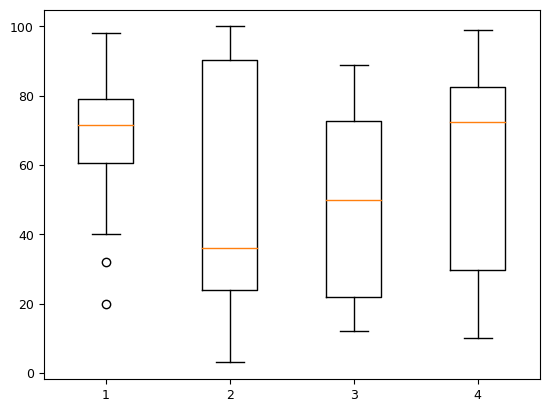

In [ ]:
value1 = [84,77,20,40,67,62,75,78,71,32,98,89,78,67,72,82,87,66,56,52]
value2=[62,5,91,25,35,32,96,99,3,90,95,34,27,55,100,15,71,11,37,21]
value3=[23,89,12,78,72,89,25,69,68,86,19,48,15,16,16,75,65,31,25,52]
value4=[59,73,73,16,81,61,88,98,10,87,29,72,16,23,72,88,78,99,75,30]

box_plot_data=[value1,value2,value3,value4]
plt.boxplot(box_plot_data)
plt.show()